In [376]:
# All imports here

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data 

In [377]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

### Inspect Data

In [378]:
df1 = df
df1.head(2)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m


In [379]:
df1.shape

(1080, 82)

In [380]:
df1.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [381]:
df1.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [382]:
print("Protien Name: ", "No of Missing Values")
print()
for i in df1.columns:
    if(df1[i].isnull().sum() != 0):
        print(i,": ",df1[i].isnull().sum())

Protien Name:  No of Missing Values

DYRK1A_N :  3
ITSN1_N :  3
BDNF_N :  3
NR1_N :  3
NR2A_N :  3
pAKT_N :  3
pBRAF_N :  3
pCAMKII_N :  3
pCREB_N :  3
pELK_N :  3
pERK_N :  3
pJNK_N :  3
PKCA_N :  3
pMEK_N :  3
pNR1_N :  3
pNR2A_N :  3
pNR2B_N :  3
pPKCAB_N :  3
pRSK_N :  3
AKT_N :  3
BRAF_N :  3
CAMKII_N :  3
CREB_N :  3
ELK_N :  18
ERK_N :  3
GSK3B_N :  3
JNK_N :  3
MEK_N :  7
TRKA_N :  3
RSK_N :  3
APP_N :  3
Bcatenin_N :  18
SOD1_N :  3
MTOR_N :  3
P38_N :  3
pMTOR_N :  3
DSCR1_N :  3
AMPKA_N :  3
NR2B_N :  3
pNUMB_N :  3
RAPTOR_N :  3
TIAM1_N :  3
pP70S6_N :  3
BAD_N :  213
BCL2_N :  285
pCFOS_N :  75
H3AcK18_N :  180
EGR1_N :  210
H3MeK4_N :  270


we can see that clearly our data has lots of missing values. We need to handle it accordingly

class
c-CS-m    150
c-CS-s    135
c-SC-m    150
c-SC-s    135
t-CS-m    135
t-CS-s    105
t-SC-m    135
t-SC-s    135
Name: MouseID, dtype: int64


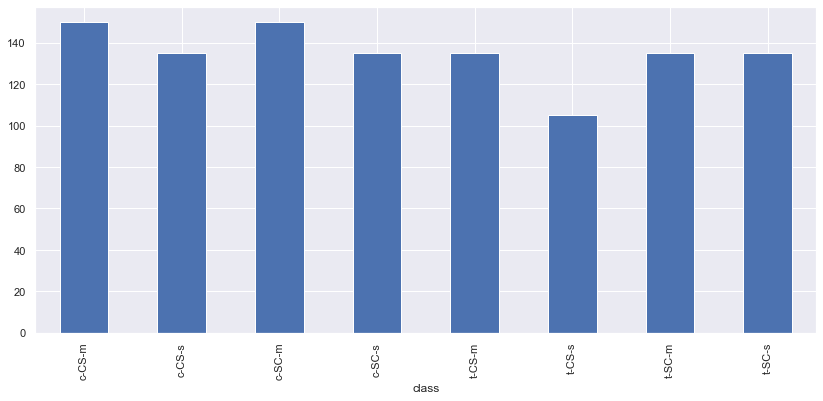

In [383]:
# To check the distribution of classes in our dataset
classCount = df1.groupby("class")['MouseID'].count()
print(classCount)
classCount.plot.bar()

We see that the representation of each class is almost balanced (still not perfectly balanced) hence we can treat our problem with this mindset.  

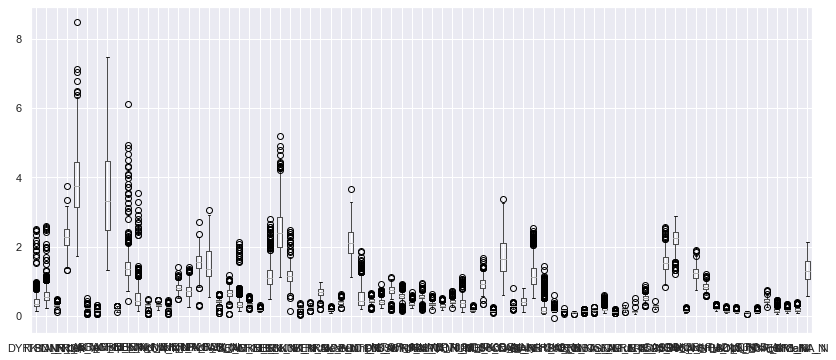

In [384]:
# outlier detection

df1.boxplot()

In [385]:
df1.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


### Tidy Data

In [386]:
# splitting mouse ID into mouse no and measurement no (Tidy data)

df1.insert(0, 'MouseNumber', df1.MouseID.apply(lambda x: x.split('_')[0]))
df1.insert(1, 'MeasurementNo', df1.MouseID.apply(lambda x: x.split('_')[1]))
df1.drop(['MouseID'], axis=1, inplace=True)

In [387]:
df1.head(2)

,MouseNumber,MeasurementNo,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309,1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309,2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m


### Data Handling 

As we have realised from the inspection that our data contains alot of missing values hence handling them is one major part of preproccesing our data

In [388]:
# replacing missing values with mean of that column (grouped by that specific class)
df2 = df1.fillna(df.groupby('class').transform('mean'))

we replaced the missing value for each protien with the mean of that column (class specific)

### Feature Selection

Since our data contains around 77 protiens among which few will be important for our model hence we will try to filter out important protiens to make our analaysis more clear

In [389]:
# Splitting data into X and Y set

Xdata = df2.loc[:, 'DYRK1A_N':'CaNA_N']
ydata = df2['class']

In [390]:
# Hill climbing algorithm

new_Ind = []
cur_MaxScore = 0.0
col_num = Xdata.shape[1]
col_Ind_Random = shuffle(range(0,col_num), random_state=1)


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Xdata.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,ydata, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(5, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selectedfeatures: " + str(cur_Score))

Score with 1 selectedfeatures: 0.16203703703703703
Score with 2 selectedfeatures: 0.21296296296296297
Score with 3 selectedfeatures: 0.2662037037037037
Score with 4 selectedfeatures: 0.35648148148148145
Score with 5 selectedfeatures: 0.4305555555555556
Score with 6 selectedfeatures: 0.4583333333333333
Score with 7 selectedfeatures: 0.4861111111111111
Score with 8 selectedfeatures: 0.49537037037037035
Score with 9 selectedfeatures: 0.5
Score with 10 selectedfeatures: 0.5300925925925926
Score with 11 selectedfeatures: 0.7013888888888888
Score with 12 selectedfeatures: 0.7199074074074074
Score with 13 selectedfeatures: 0.7453703703703703
Score with 14 selectedfeatures: 0.7523148148148148
Score with 15 selectedfeatures: 0.7638888888888888
Score with 16 selectedfeatures: 0.8958333333333334
Score with 17 selectedfeatures: 0.9004629629629629
Score with 18 selectedfeatures: 0.9027777777777778
Score with 19 selectedfeatures: 0.9143518518518519
Score with 20 selectedfeatures: 0.9166666666666666


In [391]:
# printing indices of important features identified by our model
print("Important Feature Indices : ", new_Ind[:24])

Important Feature Indices :  [31, 43, 26, 74, 58, 59, 61, 51, 36, 57, 10, 53, 34, 71, 27, 46, 15, 45, 19, 76, 70, 63, 75, 62]


The reason why I have taken 24 features us because I believe it gives us a good balance between accuracy and number of features

In [392]:
# use df3 from here on
df3 = Xdata.iloc[:,new_Ind[:24]]

In [393]:
df3.head()

,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,DSCR1_N,GFAP_N,...,MEK_N,pPKCG_N,pNR2A_N,pGSK3B_N,AKT_N,CaNA_N,pS6_N,PSD95_N,H3MeK4_N,pCASP9_N
0,3.037621,0.182150,0.264526,0.131790,0.228043,0.142756,0.247538,0.159102,0.576916,0.115291,...,0.319677,1.443091,0.605673,0.192608,0.859366,1.675652,0.106305,2.014875,0.128186,1.603310
1,2.921882,0.182086,0.255727,0.135103,0.238073,0.142037,0.257632,0.158129,0.545097,0.118235,...,0.304419,1.439460,0.587559,0.194815,0.834659,1.743610,0.106592,2.004605,0.131119,1.671738
2,2.944136,0.184388,0.259614,0.133362,0.244817,0.142445,0.255343,0.148696,0.543620,0.117760,...,0.311747,1.524364,0.602449,0.200737,0.814329,1.926427,0.108303,2.016831,0.127431,1.663550
3,2.500204,0.161768,0.259536,0.147444,0.234947,0.145068,0.251103,0.166112,0.546763,0.117439,...,0.279218,1.612382,0.520293,0.184169,0.727705,1.700563,0.103184,1.957233,0.146901,1.484624
4,2.456560,0.160200,0.250705,0.140314,0.255528,0.140871,0.251773,0.160687,0.536860,0.116048,...,0.273667,1.645807,0.507990,0.185718,0.687794,1.839730,0.104784,2.009109,0.148380,1.534835


In [394]:
# Adding features (other than protiens for the sake of exploration)

df3.insert(0, 'MouseNumber', df2['MouseNumber'])
df3.insert(1, 'MeasurementNo', df2['MeasurementNo'])
df3.insert(2, 'Genotype', df2['Genotype'])
df3.insert(3, 'Treatment', df2['Treatment'])
df3.insert(4, 'Behavior', df2['Behavior'])
df3.insert(29, 'class', df2['class'])

In [395]:
df3

,MouseNumber,MeasurementNo,Genotype,Treatment,Behavior,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,...,pPKCG_N,pNR2A_N,pGSK3B_N,AKT_N,CaNA_N,pS6_N,PSD95_N,H3MeK4_N,pCASP9_N,class
0,309,1,Control,Memantine,C/S,3.037621,0.182150,0.264526,0.131790,0.228043,...,1.443091,0.605673,0.192608,0.859366,1.675652,0.106305,2.014875,0.128186,1.603310,c-CS-m
1,309,2,Control,Memantine,C/S,2.921882,0.182086,0.255727,0.135103,0.238073,...,1.439460,0.587559,0.194815,0.834659,1.743610,0.106592,2.004605,0.131119,1.671738,c-CS-m
2,309,3,Control,Memantine,C/S,2.944136,0.184388,0.259614,0.133362,0.244817,...,1.524364,0.602449,0.200737,0.814329,1.926427,0.108303,2.016831,0.127431,1.663550,c-CS-m
3,309,4,Control,Memantine,C/S,2.500204,0.161768,0.259536,0.147444,0.234947,...,1.612382,0.520293,0.184169,0.727705,1.700563,0.103184,1.957233,0.146901,1.484624,c-CS-m
4,309,5,Control,Memantine,C/S,2.456560,0.160200,0.250705,0.140314,0.255528,...,1.645807,0.507990,0.185718,0.687794,1.839730,0.104784,2.009109,0.148380,1.534835,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295,11,Ts65Dn,Saline,S/C,1.828208,0.209433,0.236303,0.204660,0.207748,...,2.630825,0.510604,0.178130,0.638211,1.364823,0.115806,2.578046,0.328327,1.323554,t-SC-s
1076,J3295,12,Ts65Dn,Saline,S/C,1.883370,0.194333,0.245451,0.200415,0.205114,...,2.593227,0.524381,0.170422,0.645197,1.364478,0.113614,2.534347,0.293435,1.275605,t-SC-s
1077,J3295,13,Ts65Dn,Saline,S/C,1.494208,0.196736,0.216741,0.229193,0.201088,...,2.628286,0.442638,0.170807,0.540172,1.430825,0.118948,2.544515,0.355213,1.437534,t-SC-s
1078,J3295,14,Ts65Dn,Saline,S/C,1.571820,0.197567,0.238095,0.251317,0.204467,...,2.659706,0.479522,0.175413,0.564766,1.404031,0.125295,2.609769,0.365353,1.498820,t-SC-s


In [396]:
df3.describe()

,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,DSCR1_N,GFAP_N,...,MEK_N,pPKCG_N,pNR2A_N,pGSK3B_N,AKT_N,CaNA_N,pS6_N,PSD95_N,H3MeK4_N,pCASP9_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,2.148314,0.181080,0.241648,0.183557,0.221851,0.126560,0.291276,0.166631,0.585196,0.120889,...,0.272849,1.706599,0.726782,0.161211,0.682260,1.337784,0.121521,2.235236,0.204872,1.548348
std,0.432306,0.029296,0.033854,0.037454,0.034886,0.026885,0.030015,0.031896,0.100461,0.013233,...,0.040951,0.578442,0.187773,0.019308,0.127257,0.317126,0.014276,0.254395,0.050062,0.248132
min,1.134886,0.117999,0.046298,0.105537,0.111382,0.072580,0.207438,-0.062008,0.155321,0.086114,...,0.147201,0.598767,0.281285,0.099976,0.064421,0.586479,0.067254,1.206098,0.101787,0.853176
25%,1.830090,0.159334,0.220425,0.158174,0.195665,0.108895,0.270059,0.149025,0.531223,0.112765,...,0.247322,1.296830,0.591311,0.149253,0.597317,1.081423,0.110839,2.079338,0.172007,1.375598
50%,2.127140,0.178235,0.244819,0.174935,0.216902,0.123549,0.290646,0.162099,0.576981,0.120459,...,0.273826,1.664560,0.719527,0.160212,0.682629,1.317441,0.121626,2.242197,0.193994,1.522693
75%,2.419421,0.197237,0.263240,0.203197,0.246041,0.141949,0.311602,0.177411,0.634303,0.127724,...,0.300476,2.112973,0.847276,0.171739,0.758909,1.585824,0.131955,2.420226,0.230680,1.713087
max,3.680552,0.316575,0.387191,0.360692,0.331016,0.537004,0.443735,0.612377,0.916429,0.213621,...,0.415408,3.381976,1.412750,0.253210,1.182175,2.129791,0.158748,2.877873,0.413903,2.586216


## Data Exploration 

We will be focusing on first 10 features for exploration since first 10 contains some key features along with 5 protiens that have a major impact (high importance)

In [397]:
df3.head()

,MouseNumber,MeasurementNo,Genotype,Treatment,Behavior,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,...,pPKCG_N,pNR2A_N,pGSK3B_N,AKT_N,CaNA_N,pS6_N,PSD95_N,H3MeK4_N,pCASP9_N,class
0,309,1,Control,Memantine,C/S,3.037621,0.182150,0.264526,0.131790,0.228043,...,1.443091,0.605673,0.192608,0.859366,1.675652,0.106305,2.014875,0.128186,1.603310,c-CS-m
1,309,2,Control,Memantine,C/S,2.921882,0.182086,0.255727,0.135103,0.238073,...,1.439460,0.587559,0.194815,0.834659,1.743610,0.106592,2.004605,0.131119,1.671738,c-CS-m
2,309,3,Control,Memantine,C/S,2.944136,0.184388,0.259614,0.133362,0.244817,...,1.524364,0.602449,0.200737,0.814329,1.926427,0.108303,2.016831,0.127431,1.663550,c-CS-m
3,309,4,Control,Memantine,C/S,2.500204,0.161768,0.259536,0.147444,0.234947,...,1.612382,0.520293,0.184169,0.727705,1.700563,0.103184,1.957233,0.146901,1.484624,c-CS-m
4,309,5,Control,Memantine,C/S,2.456560,0.160200,0.250705,0.140314,0.255528,...,1.645807,0.507990,0.185718,0.687794,1.839730,0.104784,2.009109,0.148380,1.534835,c-CS-m


### Exploring columns

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

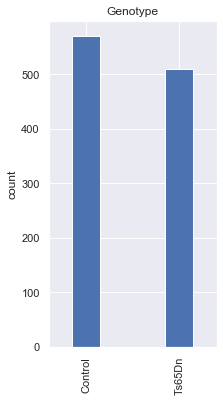

In [398]:
# Genotype column (contains eith control or trisomy categories)
# This visualisation helps us in exploring the distribution of each class in Genotype in our dataset

ax = df3['Genotype'].value_counts()
ax.plot(kind='bar', figsize= (3,6), width= 0.3)
plt.title("Genotype")
plt.ylabel("count")
display(ax)

Memantine    570
Saline       510
Name: Treatment, dtype: int64

Text(0, 0.5, 'count')

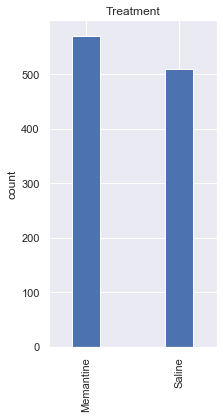

In [399]:
# Treatment type column (contains eith Memantine or Saline categories)
# This visualisation helps us in exploring the distribution of each class in our dataset

ax = df3['Treatment'].value_counts()
display(ax)
ax.plot(kind='bar', figsize= (3,6), width= 0.3)
plt.title("Treatment")
plt.ylabel("count")

S/C    555
C/S    525
Name: Behavior, dtype: int64

Text(0, 0.5, 'count')

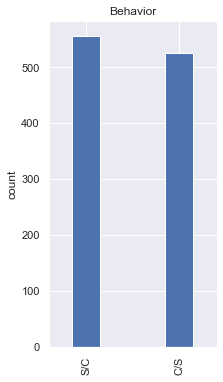

In [400]:
# Behavior column (contains behaviour type i.e context-shock (CS) or shock-context (SC))
# This visualisation helps us in exploring the distribution of each class in our dataset

ax = df3['Behavior'].value_counts()
display(ax)
ax.plot(kind='bar', figsize= (3,6), width= 0.3)
plt.title("Behavior")
plt.ylabel("count")

c-SC-m    150
c-CS-m    150
t-SC-m    135
c-SC-s    135
t-SC-s    135
c-CS-s    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64

Text(0, 0.5, 'count')

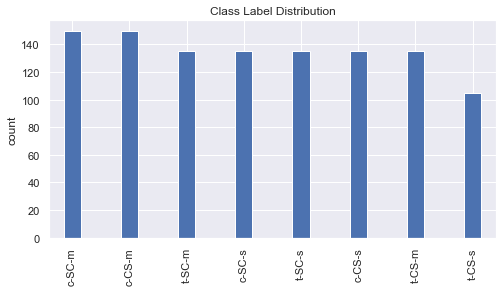

In [401]:
# Exploring class column
# This barchart shows the total distribution of each combination of class in our data

ax = df3['class'].value_counts()
display(ax)
ax.plot(kind='bar', figsize= (8,4), width= 0.3)
plt.title("Class Label Distribution")
plt.ylabel("count")

Observations containing (control, shock-context (SC), memantine) and ( control, context-shock (CS), memantine) leads our data (150 each)

Observations containing (trisomy, context-shock, saline) is the least in our data (105)

## Exploring protiens

We are going to use voilin plots to explore the protiens

In [402]:
# Function

def plot_expression_values(dfx, width, height):
    sns.set(rc={'figure.figsize':(width, height)})
    dfx = dfx.melt(var_name='protien', value_name='Expression value')
    ax = sns.violinplot(x="protien", y="Expression value", data=dfx)
    return ax

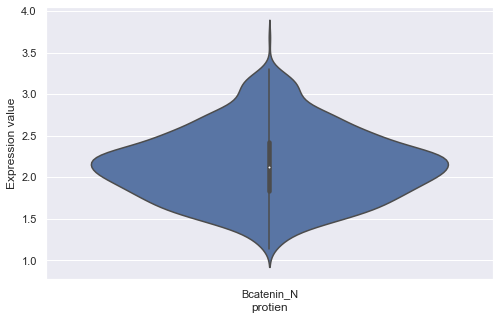

In [403]:
# most impactful protien according to our hill climbing algorithm ("Bcatenin_N")

plot_expression_values(df3.iloc[:,5:6], 8,5)

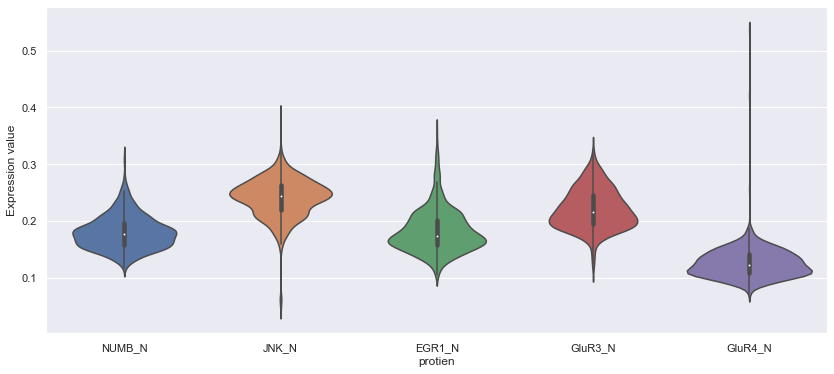

In [404]:
# next 5 important protiens (2nd to 6th)

plot_expression_values(df3.iloc[:,6:11], 14, 6)

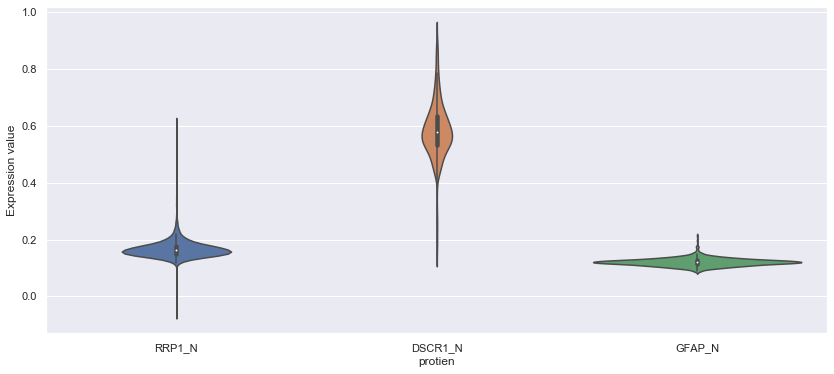

In [405]:
# next 3 important protiens (7th to 9th)

plot_expression_values(df3.iloc[:,12:15], 14, 6)

### Exploring Relationship between pair of attributes (features)

In [406]:
# Correlation Metrix (will first start by finding correlation among our top 10 protiens)

corr = df3.iloc[:,5:15].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Bcatenin_N,NUMB_N,JNK_N,EGR1_N,GluR3_N,GluR4_N,P3525_N,RRP1_N,DSCR1_N,GFAP_N
Bcatenin_N,1.000000,0.566202,0.454460,-0.350967,0.177994,0.265552,0.059422,-0.167121,0.134577,-0.202283
NUMB_N,0.566202,1.000000,0.154811,-0.420292,0.184040,0.305586,0.270061,-0.010122,-0.147351,0.108851
JNK_N,0.454460,0.154811,1.000000,0.008920,-0.221397,-0.061584,0.111747,0.113957,0.456902,0.106210
EGR1_N,-0.350967,-0.420292,0.008920,1.000000,0.116590,0.067413,0.058740,0.230404,0.263132,0.177665
GluR3_N,0.177994,0.184040,-0.221397,0.116590,1.000000,0.601518,0.036629,-0.129822,-0.260272,-0.060910
GluR4_N,0.265552,0.305586,-0.061584,0.067413,0.601518,1.000000,0.156038,0.020711,-0.032455,0.077500
P3525_N,0.059422,0.270061,0.111747,0.058740,0.036629,0.156038,1.000000,0.125930,0.028641,0.324255
RRP1_N,-0.167121,-0.010122,0.113957,0.230404,-0.129822,0.020711,0.125930,1.000000,0.275646,0.524586
DSCR1_N,0.134577,-0.147351,0.456902,0.263132,-0.260272,-0.032455,0.028641,0.275646,1.000000,0.242472
GFAP_N,-0.202283,0.108851,0.106210,0.177665,-0.060910,0.077500,0.324255,0.524586,0.242472,1.000000


This correaltion metrics paints a beautiful picture of any relation among the different protiens.

### Protien 1 (Bcatenin_N)

exploring 'Bcatenin_N' first as this was proved to be the most important protien by our hill climbing algorithm for KNN

HYPOTHESIS: Does expression level of protien "Bcatenin_N" varies significantly with any specific attribute individually ("genotype", "behaviour", "treatment")

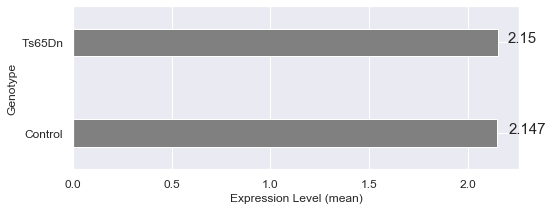

In [407]:
# Pairwise columns used ("Genotype" and "Bcatenin_N")

ax = df3.groupby(['Genotype'])['Bcatenin_N'].mean()
ax.plot(kind='barh', fontsize=12, color = 'grey', figsize=(8,3), width=0.3)

for i, k in enumerate(ax):
    k = round(k,3)
    if(i == 0):  
        plt.text(k + 0.06, i, str(k), horizontalalignment='left', fontsize= 15)
    else:
        plt.text(k + 0.05, i, str(k), horizontalalignment='left', fontsize= 15)

plt.xlabel("Expression Level (mean)", fontsize=12)
plt.show()

Treatment
Memantine    2.110879
Saline       2.190153
Name: Bcatenin_N, dtype: float64

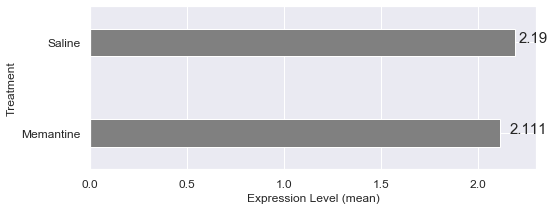

In [408]:
# Pairwise columns used ("Treatment" and "Bcatenin_N")

ax = df3.groupby(['Treatment'])['Bcatenin_N'].mean()
display(ax)
ax.plot(kind='barh', fontsize=12, color = 'grey', figsize=(8,3), width=0.3)

for i, k in enumerate(ax):
    k = round(k,3)
    if(i == 0):  
        plt.text(k + 0.05, i, str(k), horizontalalignment='left', fontsize= 15)
    else:
        plt.text(k + 0.02, i, str(k), horizontalalignment='left', fontsize= 15)

plt.xlabel("Expression Level (mean)", fontsize=12)
plt.show()

Behavior
C/S    2.110680
S/C    2.183914
Name: Bcatenin_N, dtype: float64

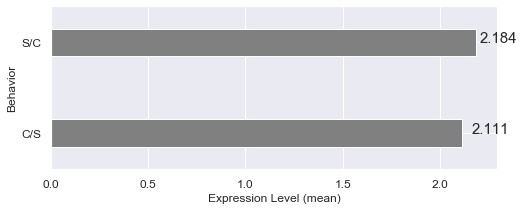

In [409]:
# Pairwise columns used ("Behavior" and "Bcatenin_N")

ax = df3.groupby(['Behavior'])['Bcatenin_N'].mean()
display(ax)
ax.plot(kind='barh', fontsize=12, color = 'grey', figsize=(8,3), width=0.3)

for i, k in enumerate(ax):
    k = round(k,3)
    if(i == 0):  
        plt.text(k + 0.05, i, str(k), horizontalalignment='left', fontsize= 15)
    else:
        plt.text(k + 0.02, i, str(k), horizontalalignment='left', fontsize= 15)

plt.xlabel("Expression Level (mean)", fontsize=12)
plt.show()

Hence we can clearly see that the attributes ("genotype", "Treatment", "behaviour") seperatly does not have any significant impact on the expression of protien "Bcatenin_N" (if assessed individually)

HYPOTHESIS :will the combination of these attributes ("genotype", "Treatment", "behaviour") which is the class have an impact on expression of protien "Bcatenin"

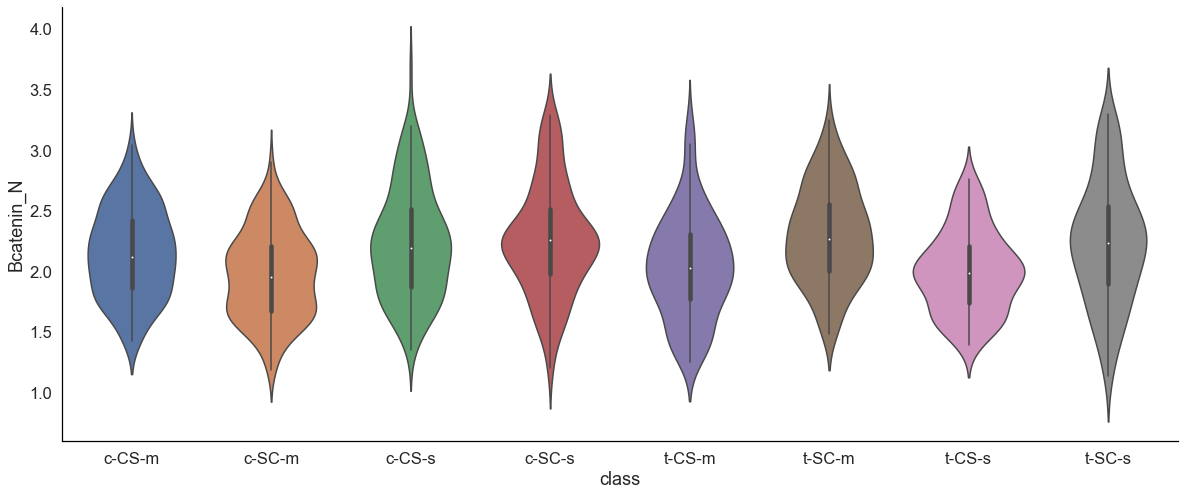

In [410]:
# voilin plot 
# Pairwise columns used ("class" and "Bcatenin_N")

sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')
sns.set(font_scale = 1.5)
g = sns.violinplot(
    y='Bcatenin_N',
    x='class',
    data=df3
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

The expression level of "Bcatenin_N" across different classes (environments i.e ""genotype", "behaviour", "treatment") seems almost identical with minor differences, hence it does tell us that different enviorments does impact the expression level of this protien but not that significantly.

Lets drill down a bit more and explore a specific class. Ill pick "t-SC-s" as it seem to contain diverse values and the minimum expression level as well

In [411]:
# getting the required class data
df_protien1class1 = df3.loc[df3['class'] == 't-SC-s']

Hypothesis : Does each mouse responds differently to same protien "Bcatenin_N"

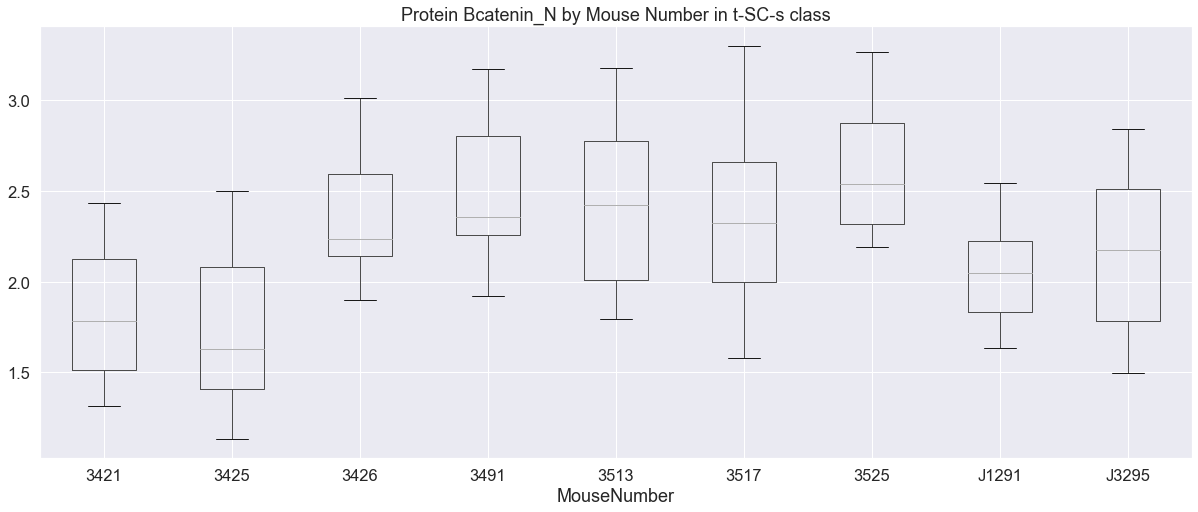

In [412]:
# Pairwise columns used ("MouseNumber" and "Bcatenin_N") with a subset of "t-SC-s" class data

df_protien1class1.boxplot(column='Bcatenin_N', by ='MouseNumber')
plt.title('Protein Bcatenin_N by Mouse Number in t-SC-s class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt.show()

This variations gives us a hint that protien "Bcatenin_N" does expresses differently in each mouse (atleast for t-SC-s class/environment)

Hypothesis : Does expression value also varies with each measurement in the same mice

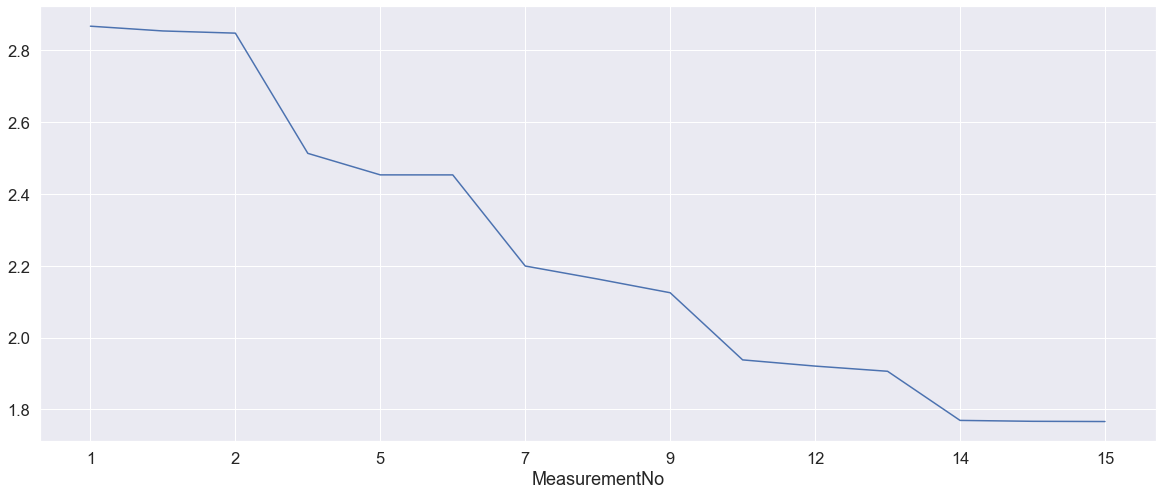

In [413]:
df_protien1class1.groupby("MeasurementNo")['Bcatenin_N'].mean().sort_values(ascending = False).plot()

A clear indication of how with each next measurement the expression value decreases in the same mice

### Results and takeaways from analysis of protien 1 "Bcatenin_N"


- Attributes like genotype, behaviour and treatment does not have a significant impact on expression level if taken individually
- Combination of these attributes which is a class (specific enviroment) does have some impact on expression level of protien
- Individual mouse does respond differently to this protien (atleast for our specific case)
- Each next Measurement(mean) shows a decrease in expression value (atleast for our specific case)

### Protien 2 (DSCR1_N)

Protien 2 choosen is "DSCR1_N" since it shows quite a diverse behaviour identified in the voilin plots. The main goal of exploring this protien would be to verify that whether results accorss different protiens remains the same or not and whether the results achieved from previous protien is a general pattern or not

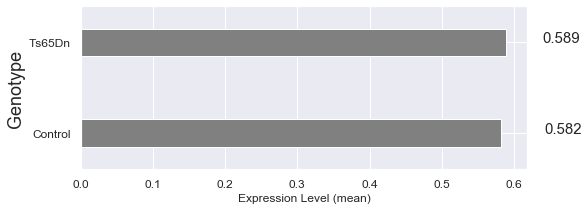

In [414]:
ax = df3.groupby(['Genotype'])['DSCR1_N'].mean()
ax.plot(kind='barh', fontsize=12, color = 'grey', figsize=(8,3), width=0.3)

for i, k in enumerate(ax):
    k = round(k,3)
    if(i == 0):  
        plt.text(k + 0.06, i, str(k), horizontalalignment='left', fontsize= 15)
    else:
        plt.text(k + 0.05, i, str(k), horizontalalignment='left', fontsize= 15)

plt.xlabel("Expression Level (mean)", fontsize=12)
plt.show()

Treatment
Memantine    0.599657
Saline       0.569034
Name: DSCR1_N, dtype: float64

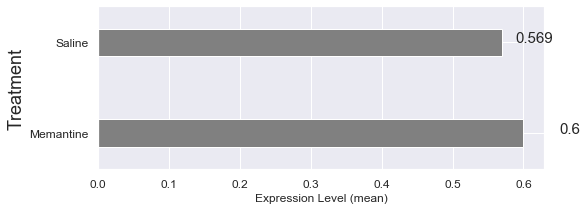

In [415]:
ax = df3.groupby(['Treatment'])['DSCR1_N'].mean()
display(ax)
ax.plot(kind='barh', fontsize=12, color = 'grey', figsize=(8,3), width=0.3)

for i, k in enumerate(ax):
    k = round(k,3)
    if(i == 0):  
        plt.text(k + 0.05, i, str(k), horizontalalignment='left', fontsize= 15)
    else:
        plt.text(k + 0.02, i, str(k), horizontalalignment='left', fontsize= 15)

plt.xlabel("Expression Level (mean)", fontsize=12)
plt.show()

Behavior
C/S    0.567901
S/C    0.601557
Name: DSCR1_N, dtype: float64

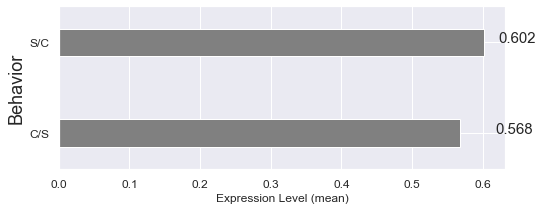

In [416]:
ax = df3.groupby(['Behavior'])['DSCR1_N'].mean()
display(ax)
ax.plot(kind='barh', fontsize=12, color = 'grey', figsize=(8,3), width=0.3)

for i, k in enumerate(ax):
    k = round(k,3)
    if(i == 0):  
        plt.text(k + 0.05, i, str(k), horizontalalignment='left', fontsize= 15)
    else:
        plt.text(k + 0.02, i, str(k), horizontalalignment='left', fontsize= 15)

plt.xlabel("Expression Level (mean)", fontsize=12)
plt.show()

This shows us that "Genotype", "Treatment" as before does not have any (significant) impact on the expression level of "DSCR1_N" protien individually but behaviour does show a bit of different behaviour

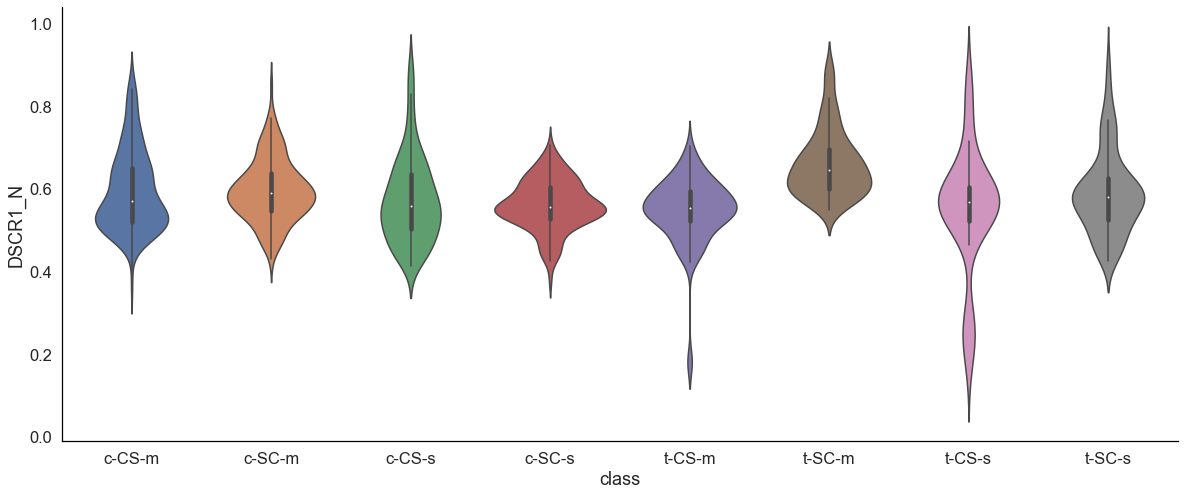

In [417]:
# voilin plot corresponding to class

sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')
sns.set(font_scale = 1.5)
g = sns.violinplot(
    y='DSCR1_N',
    x='class',
    data=df3
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

This time lets pick class with least diversity whic is "c-SC-s"

In [418]:
df_protien2class1 = df3.loc[df3['class'] == 'c-SC-s']

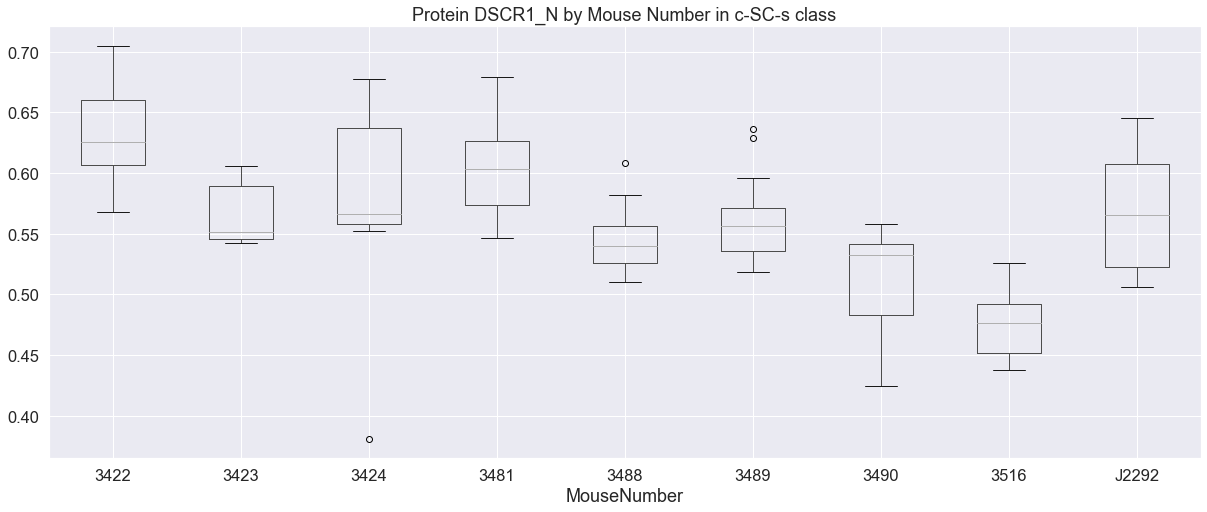

In [454]:
df_protien2class1.boxplot(column='DSCR1_N', by ='MouseNumber')
plt.title('Protein DSCR1_N by Mouse Number in c-SC-s class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt.show()

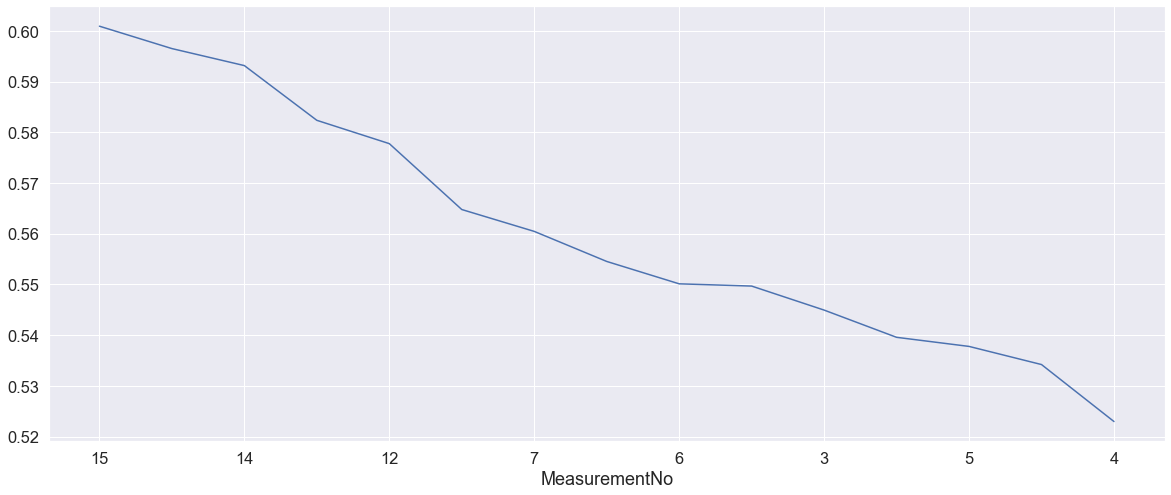

In [420]:
df_protien2class1.groupby("MeasurementNo")['DSCR1_N'].mean().sort_values(ascending = False).plot()

The trend of this protien is in line with the previous one

### Results and takeaways

This solidifies our beliefs and findings from the previous protien and gives us an idea that general trend among the various protiens is almost the same and supports our hypothesis results which were set in previous protien analysis case

### Protien GFAP_N

we will try to find some other items to explore for this protien

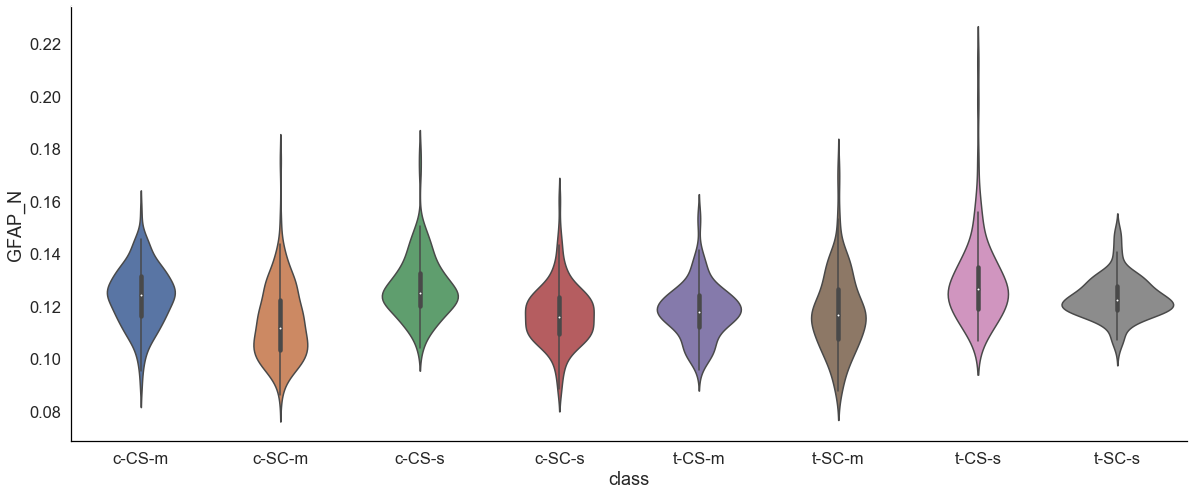

In [421]:
# voilin plot corresponding to class

sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')
sns.set(font_scale = 1.5)
g = sns.violinplot(
    y='GFAP_N',
    x='class',
    data=df3
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

In [422]:
# Lets pick class "t-CS-s" as it seems to have highest expression value
df_protien3class1 = df3.loc[df3['class'] == 't-CS-s']

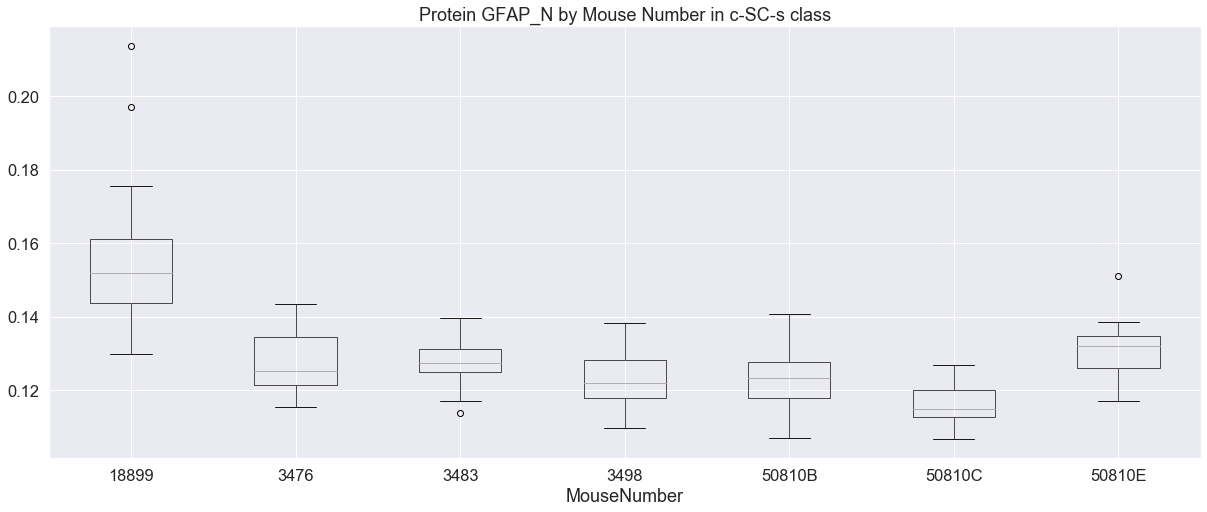

In [423]:
# Lets try to identify a particular mice that shows variance in behaviour for us to explore

df_protien3class1.boxplot(column='GFAP_N', by ='MouseNumber')
plt.title('Protein GFAP_N by Mouse Number in c-SC-s class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt.show()

In [424]:
# exploring specific mouse
# Lets pick mouse 3489 as it seems to have outliers

mice18899=df_protien3class1.loc[df_protien3class1['MouseNumber'] == '18899']

Hypothesis: Does each protien have same expression level in a single specific mice

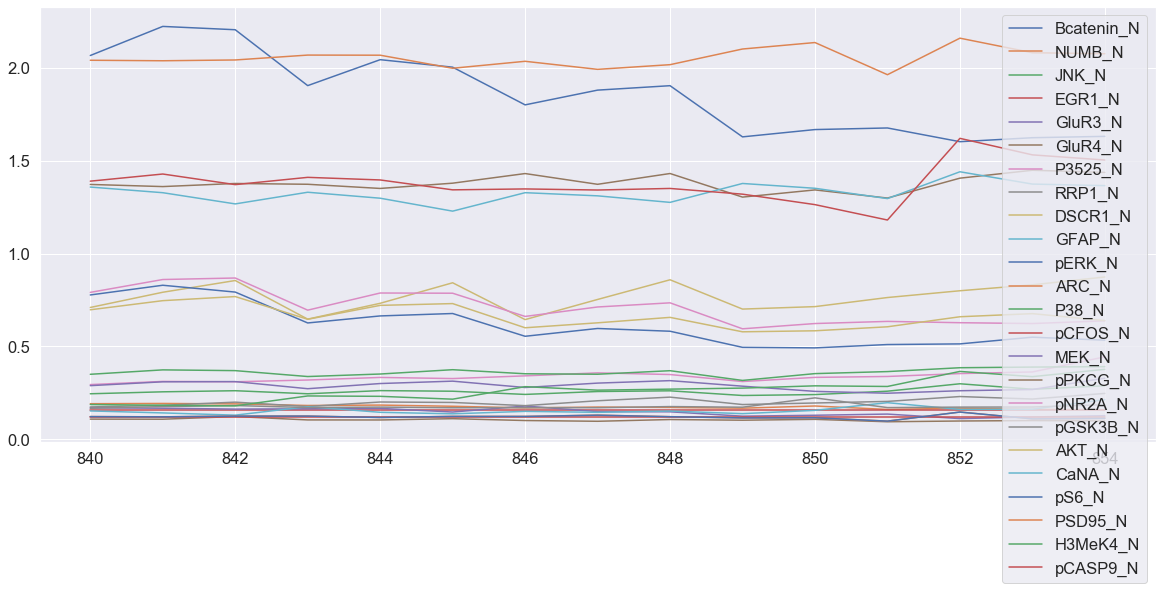

In [425]:
# this shows expression level of different protiens for mouse "18899" for a specific class
# pairwise columns used "MouseID" and "All protiens (77 columns)"

mice18899.plot()

Results and Take aways from this
- Different protiens have different expression values for a same mouse 

### Relationship among the three protiens 

In [426]:
# Using scatter plot to explore relation

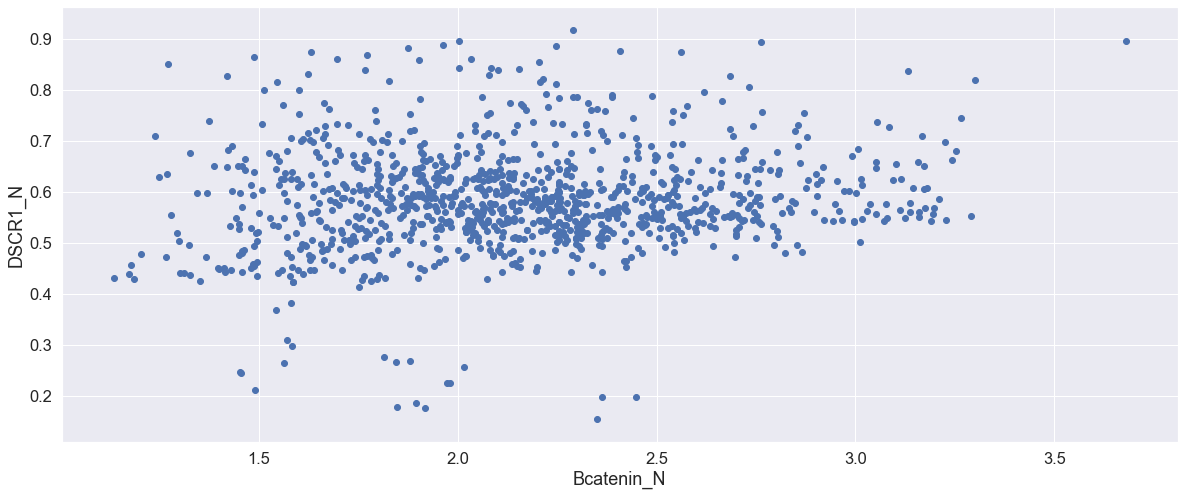

In [427]:
# Pairwise columns used "Bcatenin_N", "DSCR1_N"

plt.scatter(df3.Bcatenin_N,df3.DSCR1_N)
plt.xlabel("Bcatenin_N")
plt.ylabel("DSCR1_N")
plt.show()

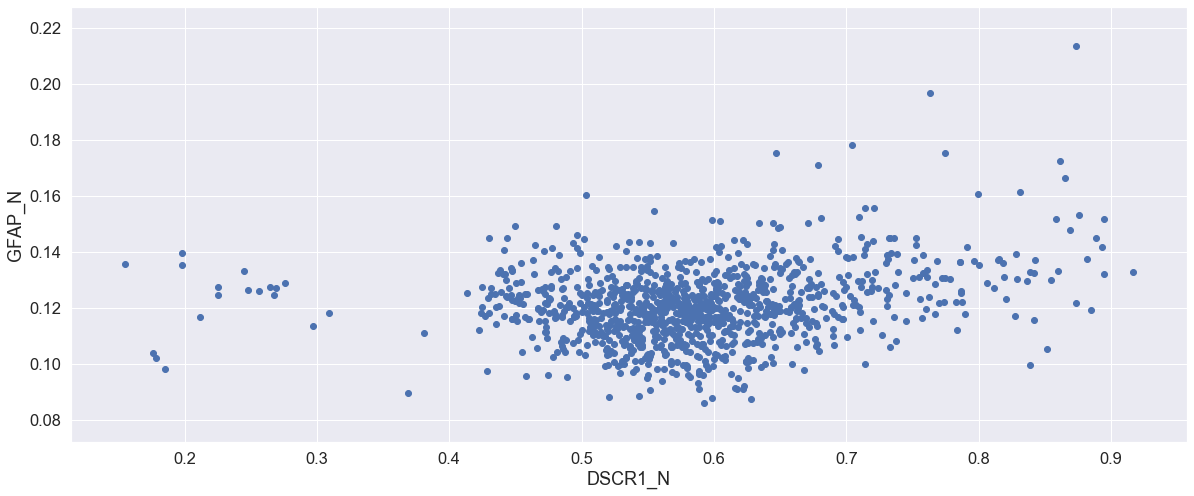

In [428]:
# Pairwise columns used "DSCR1_N", "GFAP_N"

plt.scatter(df3.DSCR1_N, df3.GFAP_N)
plt.xlabel("DSCR1_N")
plt.ylabel("GFAP_N")
plt.show()

# Modeling part

### KNN Classifier

In [429]:
# imports specific to KNN Classifier

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#### Data Preprocessing for KNN

In [430]:
# Seperating X(Input values) and Y(Output)

XData = df2.loc[:, 'DYRK1A_N':'CaNA_N']
yData = df2['class']

In [431]:
# preprocessing the data

# standard scaler
scaler = preprocessing.StandardScaler()
XData[:] = scaler.fit_transform(XData[:])

# normalization
normalizer = preprocessing.Normalizer()
XData[:] = normalizer.fit_transform(XData[:])

Text(0, 0.5, 'accuracy_rate')

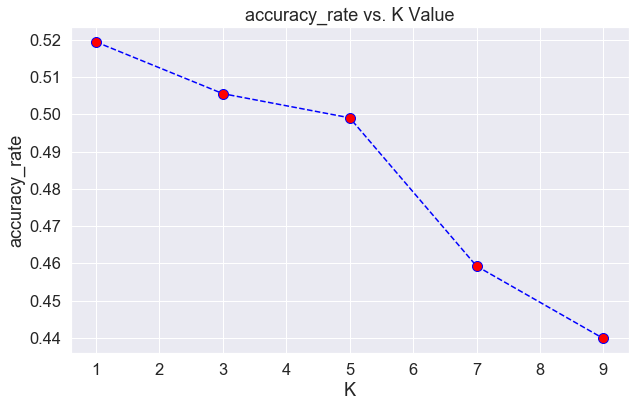

In [432]:
# Finding best K

accuracy_rate = []

for i in range(1,11,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,XData,yData,cv=5)
    accuracy_rate.append(score.mean())
    
# plotting best "k" value    
plt.figure(figsize=(10,6))
plt.plot(range(1,11,2),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('accuracy_rate')

We realise that the best accuracy we obtain is around at k value of 3

In [433]:
# Important feature selection for decision tree using Hill climbing algorithm

new_Ind = []
cur_MaxScore = 0.0
col_num = XData.shape[1]
col_Ind_Random = shuffle(range(0,col_num), random_state=1)


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = XData.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,ydata, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(5, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selectedfeatures: " + str(cur_Score))

Score with 1 selectedfeatures: 0.13194444444444445
Score with 2 selectedfeatures: 0.24074074074074073
Score with 3 selectedfeatures: 0.34953703703703703
Score with 4 selectedfeatures: 0.4791666666666667
Score with 5 selectedfeatures: 0.6041666666666666
Score with 6 selectedfeatures: 0.6203703703703703
Score with 7 selectedfeatures: 0.6875
Score with 8 selectedfeatures: 0.7083333333333334
Score with 9 selectedfeatures: 0.7638888888888888
Score with 10 selectedfeatures: 0.7638888888888888
Score with 11 selectedfeatures: 0.8171296296296297
Score with 12 selectedfeatures: 0.8611111111111112
Score with 13 selectedfeatures: 0.8611111111111112
Score with 14 selectedfeatures: 0.8657407407407407
Score with 15 selectedfeatures: 0.8912037037037037
Score with 16 selectedfeatures: 0.8958333333333334
Score with 17 selectedfeatures: 0.9097222222222222
Score with 18 selectedfeatures: 0.9259259259259259
Score with 19 selectedfeatures: 0.9305555555555556
Score with 20 selectedfeatures: 0.935185185185185

In [434]:
# printing indices of important features identified by our model
print("Important Feature Indices : ", new_Ind[:40])

# Taking 40 most important features
XData = XData.iloc[:,new_Ind[:40]]

Important Feature Indices :  [31, 43, 26, 74, 58, 59, 61, 51, 36, 57, 10, 53, 71, 27, 46, 15, 45, 19, 63, 75, 62, 55, 21, 56, 39, 47, 0, 69, 48, 7, 13, 30, 49, 41, 14, 28, 65, 50, 1, 72]


In [435]:
# Splitting data into X and Y set to get latest data

X_train, X_test, y_train, y_test = train_test_split(XData, yData, test_size=0.20, random_state=42, stratify=yData )

In [436]:
# model and training

KNNmodel = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
KNNmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [437]:
#Prediction

y_pred= KNNmodel.predict(X_test)

In [438]:
# Analysing

print("Accuracy:",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print()
print("Classification Report")
print(classification_report(y_test,y_pred))
print
print("Confusion Matric")
print(cm)


Accuracy: 0.9907407407407407

Classification Report
              precision    recall  f1-score   support

      c-CS-m       1.00      0.97      0.98        30
      c-CS-s       1.00      1.00      1.00        27
      c-SC-m       1.00      0.97      0.98        30
      c-SC-s       0.96      1.00      0.98        27
      t-CS-m       1.00      1.00      1.00        27
      t-CS-s       0.95      1.00      0.98        21
      t-SC-m       1.00      1.00      1.00        27
      t-SC-s       1.00      1.00      1.00        27

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216

Confusion Matric
[[29  0  0  0  0  1  0  0]
 [ 0 27  0  0  0  0  0  0]
 [ 0  0 29  1  0  0  0  0]
 [ 0  0  0 27  0  0  0  0]
 [ 0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 27]]


### Decision Tree

In [439]:
# imports related to Decision Tree

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

In [440]:
# Seperating X(Input values) and Y(Output)

Xdata = df2.loc[:, 'DYRK1A_N':'CaNA_N']
ydata = df2['class']

In [444]:
# Important feature selection for decision tree using Hill climbing algorithm

new_Ind = []
cur_MaxScore = 0.0
col_num = Xdata.shape[1]
col_Ind_Random = shuffle(range(0,col_num), random_state=1)


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Xdata.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,ydata, test_size=0.4, random_state=0)
    clf = DecisionTreeClassifier()
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selectedfeatures: " + str(cur_Score))

Score with 1 selectedfeatures: 0.3263888888888889
Score with 2 selectedfeatures: 0.4074074074074074
Score with 3 selectedfeatures: 0.44907407407407407
Score with 4 selectedfeatures: 0.49537037037037035
Score with 5 selectedfeatures: 0.5208333333333334
Score with 6 selectedfeatures: 0.5324074074074074
Score with 7 selectedfeatures: 0.5555555555555556
Score with 8 selectedfeatures: 0.5763888888888888
Score with 9 selectedfeatures: 0.6342592592592593
Score with 10 selectedfeatures: 0.6574074074074074
Score with 11 selectedfeatures: 0.6967592592592593
Score with 12 selectedfeatures: 0.7962962962962963


In [445]:
# printing indices of important features identified by our model
print("Important Feature Indices : ", new_Ind[:17])

# use df3 from here on
Xdata = Xdata.iloc[:,new_Ind[:12]]

Important Feature Indices :  [3, 13, 7, 2, 6, 10, 4, 1, 14, 16, 9, 12]


In [446]:
# Splitting data into X and Y set

X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.20, random_state=42, stratify=yData )

In [447]:
# Simple model and training

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [448]:
# predicting
y_pred = clf.predict(X_test)

In [449]:
# Analysing

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print()
print("Classification Report")
print(classification_report(y_test,y_pred))
print
print("Confusion Matric")
print(cm)

Accuracy: 0.8287037037037037

Classification Report
              precision    recall  f1-score   support

      c-CS-m       0.83      0.80      0.81        30
      c-CS-s       0.74      0.74      0.74        27
      c-SC-m       0.96      0.83      0.89        30
      c-SC-s       0.81      0.93      0.86        27
      t-CS-m       0.74      0.74      0.74        27
      t-CS-s       0.76      0.76      0.76        21
      t-SC-m       0.86      0.93      0.89        27
      t-SC-s       0.92      0.89      0.91        27

    accuracy                           0.83       216
   macro avg       0.83      0.83      0.83       216
weighted avg       0.83      0.83      0.83       216

Confusion Matric
[[24  2  0  0  1  2  1  0]
 [ 2 20  0  1  4  0  0  0]
 [ 0  0 25  3  0  0  2  0]
 [ 0  0  0 25  0  0  1  1]
 [ 0  3  0  0 20  3  0  1]
 [ 2  2  0  0  1 16  0  0]
 [ 0  0  1  1  0  0 25  0]
 [ 1  0  0  1  1  0  0 24]]


In [450]:
# importing packages
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# creating an instance of the Decision tree model
# n_jobs=-1 makes it so that computations run in parallel
DecisionTreemodel = DecisionTreeClassifier()

# setting the parameters I want to test
params = {'max_depth': list(range(3,15)),'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

# creating a grid search with the parameters I chose
grid = GridSearchCV(DecisionTreemodel, param_grid=params, n_jobs=1, scoring='accuracy')

# fitting the model
grid.fit(X_train, y_train)

#print the best combination of parameters
print("Best Hyper Parameters:\n",grid.best_params_)

Best Hyper Parameters:
 {'max_depth': 14, 'max_leaf_nodes': 95, 'min_samples_split': 2}


In [451]:
# training and predicting on optimized parameters

clf = DecisionTreeClassifier(max_depth= 14, max_leaf_nodes= 92, min_samples_split= 2)
clf = clf.fit(X_train,y_train)

In [452]:
# predicting on new optimized parameters

y_pred = clf.predict(X_test)

In [453]:
# Analysing

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print()
print("Classification Report")
print(classification_report(y_test,y_pred))
print
print("Confusion Matric")
print(cm)

Accuracy: 0.8333333333333334

Classification Report
              precision    recall  f1-score   support

      c-CS-m       0.75      0.80      0.77        30
      c-CS-s       0.76      0.81      0.79        27
      c-SC-m       0.96      0.83      0.89        30
      c-SC-s       0.81      0.96      0.88        27
      t-CS-m       0.80      0.74      0.77        27
      t-CS-s       0.75      0.71      0.73        21
      t-SC-m       0.86      0.93      0.89        27
      t-SC-s       1.00      0.85      0.92        27

    accuracy                           0.83       216
   macro avg       0.84      0.83      0.83       216
weighted avg       0.84      0.83      0.83       216

Confusion Matric
[[24  2  0  0  1  2  1  0]
 [ 3 22  0  1  1  0  0  0]
 [ 0  0 25  3  0  0  2  0]
 [ 0  0  0 26  0  0  1  0]
 [ 2  2  0  0 20  3  0  0]
 [ 2  2  0  0  2 15  0  0]
 [ 0  0  1  1  0  0 25  0]
 [ 1  1  0  1  1  0  0 23]]
